<a href="https://colab.research.google.com/github/pedrobslima/proj-respAI/blob/main/respAI_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv

min 8 features úteis (o menor num dentre os datasets utilizados em aula, diabetes)

Dicionário dataset:
* battery_power: Total energy a battery can store in one time measured in mAh
* blue: Has bluetooth or not
* clock_speed: speed at which microprocessor executes instructions
* dual_sim: Has dual sim support or not
* fc: Front Camera mega pixels
* four_g: Has 4G or not
* int_memory: Internal Memory in Gigabytes
* m_dep: Mobile Depth in cm
* mobile_wt: Weight of mobile phone
* n_cores: Number of cores of processor
* pc: Primary Camera mega pixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: Random Access Memory in Mega Bytes
* sc_h: Screen Height of mobile in cm
* sc_w: Screen Width of mobile in cm
* talk_time: longest time that a single battery charge will last when you are
* three_g: Has 3G or not
* touch_screen: Has touch screen or not
* wifi: Has wifi or not
---
* price_range: The target variable with value:
  * 0: low cost
  * 1: medium cost
  * 2: high cost
  * 3: very high cost

### Imports

In [18]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay as pdp
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### dataset

In [2]:
df = pd.read_csv("/content/mobile_price.csv")

In [3]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [5]:
X = df.drop(columns=['price_range'])
y = df['price_range'] #.astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [7]:
y.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [27]:
display_labels = ['Baixo', 'Médio', 'Alto', 'Mto alto']

### Functions

In [24]:
def checkMetrics(test, pred, display=None):
  global y
  labels = np.sort(y.unique())
  print(f"Acurácia: {accuracy_score(test, pred)}")
  print(f"Precisão: {precision_score(test, pred, labels=labels, average='macro')}")
  print(f"Recall: {recall_score(test, pred, labels=labels, average='macro')}")
  print(f"F1-Score: {f1_score(test, pred, labels=labels, average='macro')}")
  print("Matriz de Confusão:")

  cm = confusion_matrix(test, pred, labels=labels)

  if(display):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=display)
  else:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

  disp.plot()

  plt.show()

### **LEARNING THE DECISION TREE CLASSIFIER**

In [25]:
dtree = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=50).fit(X_train, y_train)

[Text(0.5133928571428571, 0.9166666666666666, 'ram <= 2241.5\nentropy = 1.999\nsamples = 1500\nvalue = [375, 361, 370, 394]\nclass = y[3]'),
 Text(0.23660714285714285, 0.75, 'ram <= 1103.0\nentropy = 1.356\nsamples = 770\nvalue = [375, 321, 74, 0]\nclass = y[0]'),
 Text(0.09821428571428571, 0.5833333333333334, 'px_height <= 708.5\nentropy = 0.478\nsamples = 340\nvalue = [305, 35, 0, 0]\nclass = y[0]'),
 Text(0.03571428571428571, 0.4166666666666667, 'ram <= 818.0\nentropy = 0.163\nsamples = 209\nvalue = [204, 5, 0, 0]\nclass = y[0]'),
 Text(0.017857142857142856, 0.25, 'entropy = 0.0\nsamples = 141\nvalue = [141, 0, 0, 0]\nclass = y[0]'),
 Text(0.05357142857142857, 0.25, 'battery_power <= 1639.0\nentropy = 0.379\nsamples = 68\nvalue = [63, 5, 0, 0]\nclass = y[0]'),
 Text(0.03571428571428571, 0.08333333333333333, 'entropy = 0.122\nsamples = 60\nvalue = [59, 1, 0, 0]\nclass = y[0]'),
 Text(0.07142857142857142, 0.08333333333333333, 'entropy = 1.0\nsamples = 8\nvalue = [4, 4, 0, 0]\nclass = 

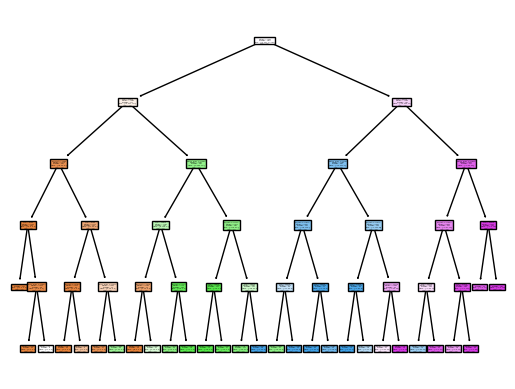

In [12]:
tree.plot_tree(dtree, feature_names = X.columns, class_names=True,filled = True)

Acurácia: 0.824
Precisão: 0.8287944103368226
Recall: 0.8261486984577795
F1-Score: 0.8246535247697359
Matriz de Confusão:


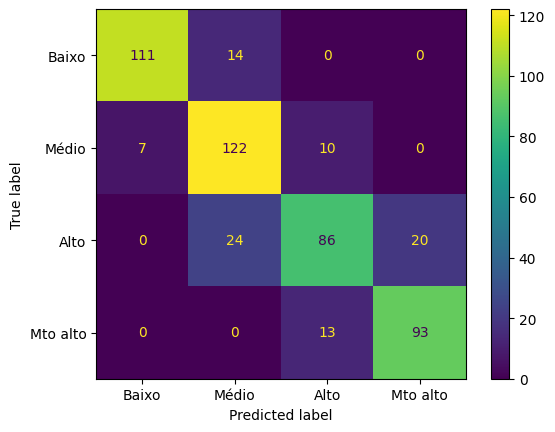

In [33]:
y_preddt1 = dtree.predict(X_test)
checkMetrics(y_test, y_preddt1, display=display_labels)

---

In [21]:
bigdtree = DecisionTreeClassifier(max_depth=10, criterion='entropy', min_samples_split=50).fit(X_train, y_train)

[Text(0.5090725806451613, 0.95, 'ram <= 2241.5\nentropy = 1.999\nsamples = 1500\nvalue = [375, 361, 370, 394]\nclass = y[3]'),
 Text(0.22580645161290322, 0.85, 'ram <= 1103.0\nentropy = 1.356\nsamples = 770\nvalue = [375, 321, 74, 0]\nclass = y[0]'),
 Text(0.08870967741935484, 0.75, 'px_height <= 708.5\nentropy = 0.478\nsamples = 340\nvalue = [305, 35, 0, 0]\nclass = y[0]'),
 Text(0.03225806451612903, 0.65, 'ram <= 818.0\nentropy = 0.163\nsamples = 209\nvalue = [204, 5, 0, 0]\nclass = y[0]'),
 Text(0.016129032258064516, 0.55, 'entropy = 0.0\nsamples = 141\nvalue = [141, 0, 0, 0]\nclass = y[0]'),
 Text(0.04838709677419355, 0.55, 'battery_power <= 1639.0\nentropy = 0.379\nsamples = 68\nvalue = [63, 5, 0, 0]\nclass = y[0]'),
 Text(0.03225806451612903, 0.45, 'px_width <= 1853.5\nentropy = 0.122\nsamples = 60\nvalue = [59, 1, 0, 0]\nclass = y[0]'),
 Text(0.016129032258064516, 0.35, 'entropy = 0.0\nsamples = 58\nvalue = [58, 0, 0, 0]\nclass = y[0]'),
 Text(0.04838709677419355, 0.35, 'entropy

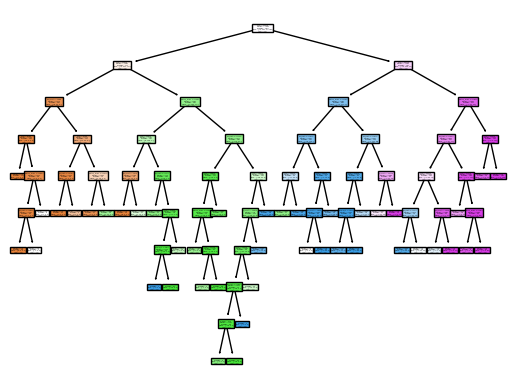

In [22]:
tree.plot_tree(bigdtree, feature_names = X.columns, class_names=True,filled = True)

Acurácia: 0.812
Precisão: 0.8157653662389456
Recall: 0.8139265748504245
F1-Score: 0.81377768812439
Matriz de Confusão:


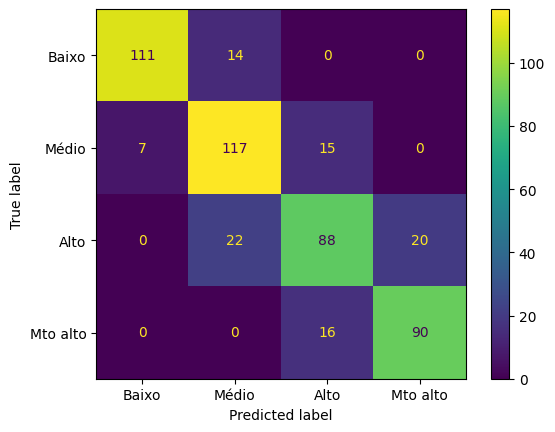

In [34]:
y_preddt2 = bigdtree.predict(X_test)
checkMetrics(y_test, y_preddt2, display_labels)

piorou! indicativo de overfitting

Observação: As previsões erradas são bem alinhadas com seus labels originais, por exemplo, não há ocasiões em que celulares de preços altos foram previstos tendo preços baixos, só de preços médios e muito altos

###**LEARNING THE RF CLASSIFIER**

In [29]:
rforest = RandomForestClassifier(max_depth=10).fit(X_train, y_train)

In [31]:
y_predrf = rforest.predict(X_test)

Acurácia: 0.836
Precisão: 0.837470079508997
Recall: 0.8411180315544372
F1-Score: 0.8388709165842554
Matriz de Confusão:


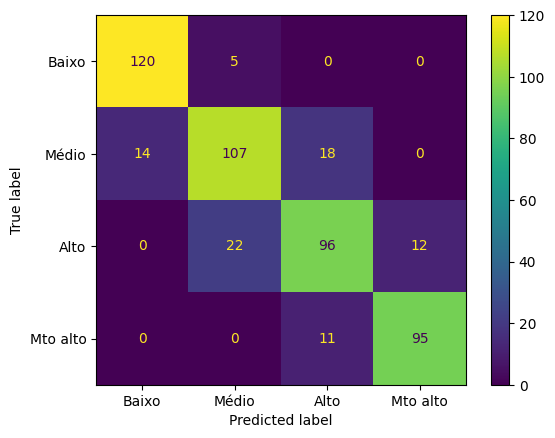

In [32]:
checkMetrics(y_test, y_predrf, display_labels)

###**LEARNING THE MLP CLASSIFIER**

In [128]:
mlp = MLPClassifier(learning_rate_init=0.001, alpha=0.01, early_stopping=True).fit(X_train, y_train)

<Axes: >

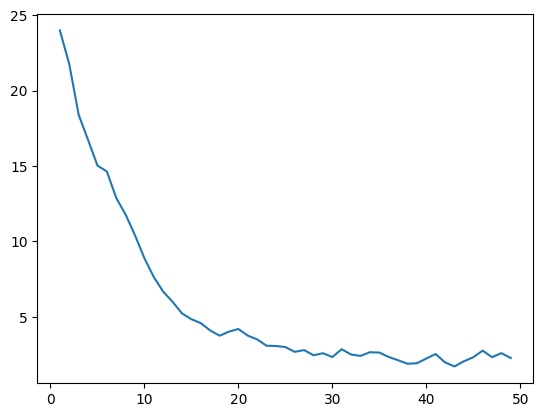

In [129]:
sns.lineplot(y=mlp.loss_curve_, x=range(1, mlp.n_iter_ + 1))

Acurácia: 0.608
Precisão: 0.6284203675331634
Recall: 0.614985162523102
F1-Score: 0.6126283631811968
Matriz de Confusão:


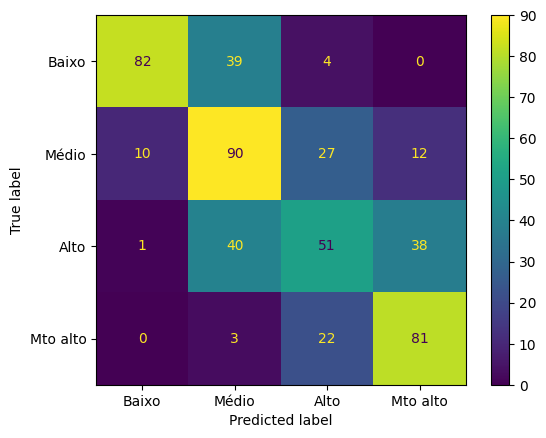

In [130]:
y_predmlp = mlp.predict(X_test)
checkMetrics(y_test, y_predmlp, display_labels)

Acurácia: 0.684
Precisão: 0.7031373986544764
Recall: 0.6849188167608149
F1-Score: 0.6883618323475132
Matriz de Confusão:


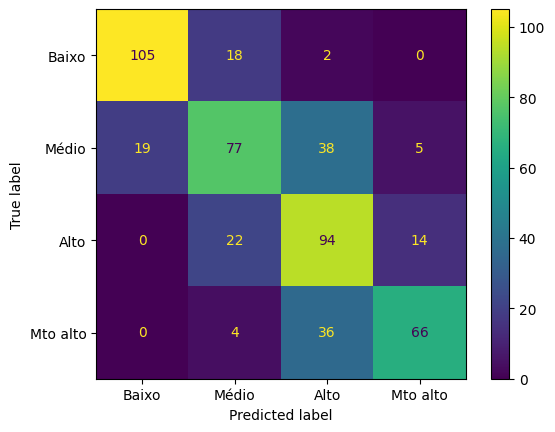

In [99]:
y_predmlp = mlp.predict(X_test)
checkMetrics(y_test, y_predmlp, display_labels)

Acurácia: 0.674
Precisão: 0.6740894462161138
Recall: 0.6879328502365016
F1-Score: 0.6684357275135571
Matriz de Confusão:


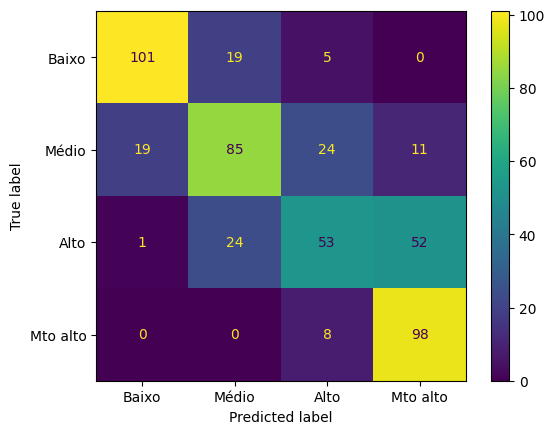

In [87]:
y_predmlp = mlp.predict(X_test)
checkMetrics(y_test, y_predmlp, display_labels)

### **LEARNING THE KNN CLASSIFIER**

9


<Axes: >

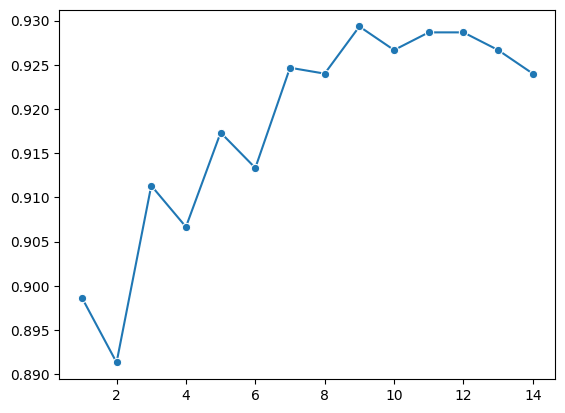

In [43]:
k_values = [i for i in range(1,15)]
scores = []

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, X_train, y_train, cv=5)
  scores.append(np.mean(score))
  if(scores[-1] >= max(scores)):
    k_best = k

print(k_best)
sns.lineplot(x=k_values,y=scores, marker ='o')

In [44]:
knn = KNeighborsClassifier(n_neighbors=k_best).fit(X_train, y_train)

Acurácia: 0.938
Precisão: 0.9393004662791031
Recall: 0.9387865220160592
F1-Score: 0.9390348529805017
Matriz de Confusão:


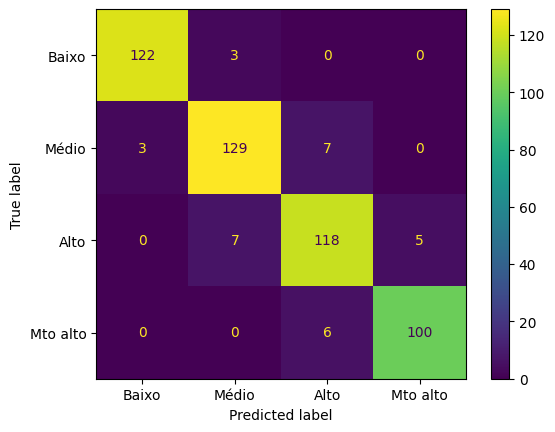

In [45]:
y_predknn = knn.predict(X_test)
checkMetrics(y_test, y_predknn, display_labels)

## PFIs + PDPs

### rf

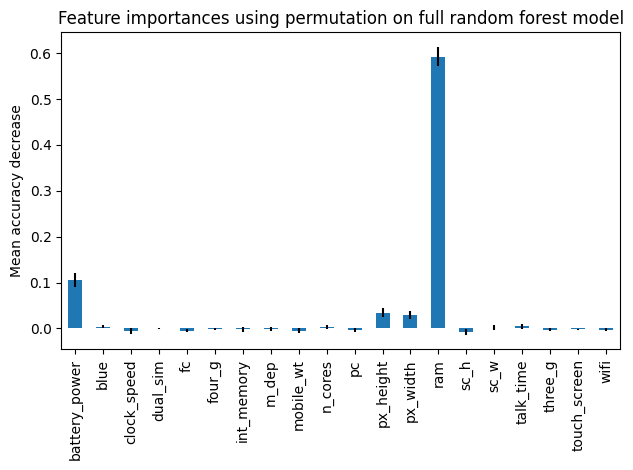

In [ ]:
fresult = permutation_importance(rforest, X_test, y_test,n_repeats=30, random_state=0)

forest_importances = pd.Series(fresult.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=fresult.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full random forest model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
# [0, 6, 7]
pdp.from_estimator(rforest, X_train, [0, 6, 7])

###mlp

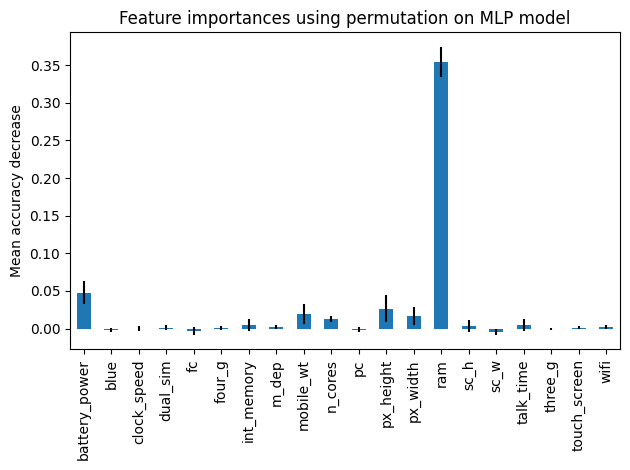

In [ ]:
mlpresult = permutation_importance(mlp, X_test, y_test,n_repeats=30, random_state=0)

mlp_importances = pd.Series(mlpresult.importances_mean, index=X.columns)

fig, ax = plt.subplots()

mlp_importances.plot.bar(yerr=mlpresult.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on MLP model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
# [4, 5, 7]
pdp.from_estimator(mlp, X_train, [4, 5, 7])

### knn

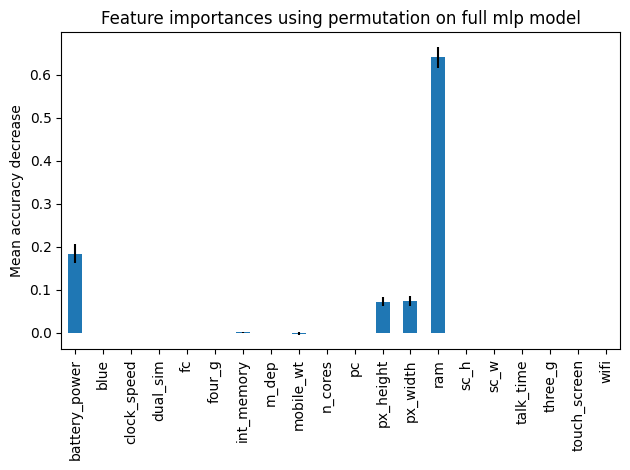

In [ ]:
knnresult = permutation_importance(knn, X_test, y_test,n_repeats=30, random_state=0)

knn_importances = pd.Series(knnresult.importances_mean, index=X.columns)

fig, ax = plt.subplots()

knn_importances.plot.bar(yerr=knnresult.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full mlp model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
pdp.from_estimator(knn, X_train, [6, 11, 12], grid_resolution=20)